# What is a valid trading strategy?

* A trading strategy is a procedure that maps any information known up to time t, into a set of trading instructions for time  $T>t$.

* The weights of a trading strategy must either:
   * Add up to 1. So it describes what you do with your entire capital.
   * Or add up to 0. So the strategy is self-financing. For example, borrow 1 dollar at the risk-free rate and buy 1 dollar worth of the market portfolio
   * Every time you trade on the excess returns, you can think of the weights "adding up to zero"

* It is very important that the trading strategy only uses information that is known at the time of the trade, otherwise it is not a valid trading strategy-- you obviously cannot trade on info that you don't know

* It is very important that you are clear about where the dollars that you invest come from, so that the weights can add up to 1 (if you have some capital) or zero (if the strategy is self-financed and demand zero capital).

  * In practice all strategies demand capital as no bank allow us to borrow without putting some capital in, but these self financed strategies are quite convenient to work with as they are all in the "Excess Return Space" since they have zero cost. 
  
  * If you don't know what I am talking about, go back to notebook 3, 4 and 5.

* Example of a VALID trading strategy: Every monday buy stocks that had positive news coverage during the weekend and sell stocks that had negative news coverage.
  * This is valid because you are trading after the information is known.

* Example of INVALID trading strategy: On Friday buy all the stocks that will have positive news coverage during the weekend, and sell all the stocks that will have negative coverage during the weekend.

   * This is Invalid because you are trading before the information is known.
   
* This might sound ridicoulous. Obviously you can not trade on the information that is not known at the time of the trade!

* But note that we will be "simulating" the trading process using HISTORICAL data, so we can easily get confused and use "future" information in the strategy construction process.




# Quantitative trading strategies

* In this class we will focus on quantitative trading strategies. 

* Stragies that get some hard data about one or multiple assets and transform this data "mechanically"  into  portfolio weights

* So given data $X_{t}$, a quatitative trading strategy is a function that maps data into weights $W_{t+1}=f(X_t)$

* Example of "Market Timing" 1: Betting on the "market momentum"
  * If months t, t-1 and t-2 the market had postive returns in each of the months, then buy 1 dollar at the closing price of month t and sell and the closing price of month t+1
  
  * Otherwise invest in the risk-free asset

* Example of "Market Timing" 2: Volatility timing
  * Using daily data for month t, construct the market return "realized variance" during month t
   
   $$RV_t=\sum_{d \in days~ in ~month ~t}\frac{(R_d- \overline{R})^2}{N_{days}},$$
   
      where $\overline{R}$ is the average return within the month
   
  * Buy stocks at the closing price of month t accoding to the rule:
   
   $$W_t=\frac{c}{RV_t},$$
   
      where $c$ is some constant.
   
  * Hold for a month
   
*    Example of "cross-sectional" strategy 1: Betting on the short-term reversal across industries
       
  * Sort portfolios of industries by their close to close returns in month t.
    
  * Buy the botton  10% , short the top 10% 
    
  * Hold for a month

   
*    Example of "cross-sectional" strategy 2: Betting on the volatility across stocks
       
       * Construct stock realized variance in the last 24 months
       
       * Sort stocks by realized variance
       
       * Buy the bottom 10%, short the top 10%
       
       * Hold for a month


>All these strategies map past data into a trading rule
  * This allows us to backtest the strategy and see how it would have performed in a variety of investment conditions
  * This ability to look back is the essential feature of quantitative investing



## Market Timing: Betting on continuation



### Construct our first trading strategy

In [19]:
# start by loading data on the returns of the market portfolio and the risk-free rate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:

#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])
Data=Data.rename(columns={Data.columns[1]: "MKTUS",Data.columns[2]: "BondUS",
                          Data.columns[3]: "EM",Data.columns[4]: "MKTxUS",Data.columns[5]: "BondxUS" })
Data=Data[['RF','MKTUS']]
Data.head()

,RF,MKTUS
Date,,
1963-02-28,0.0023,-0.0215
1963-03-31,0.0023,0.0331
1963-04-30,0.0025,0.0476
1963-05-31,0.0024,0.0200
1963-06-30,0.0023,-0.0177


We start by constructing  the timing strategy 1: Buy if market went up for three consecutive months

In [22]:
Data.MKTUS.tail(10)

Date
2016-03-31    0.0698
2016-04-30    0.0093
2016-05-31    0.0179
2016-06-30   -0.0003
2016-07-31    0.0397
2016-08-31    0.0052
2016-09-30    0.0027
2016-10-31   -0.0200
2016-11-30    0.0487
2016-12-31    0.0185
Name: MKTUS, dtype: float64

In [24]:
# We use .shift(1) to lag the data by 1 period
Data.MKTUS.shift(1).tail(10)

Date
2016-03-31   -0.0005
2016-04-30    0.0698
2016-05-31    0.0093
2016-06-30    0.0179
2016-07-31   -0.0003
2016-08-31    0.0397
2016-09-30    0.0052
2016-10-31    0.0027
2016-11-30   -0.0200
2016-12-31    0.0487
Name: MKTUS, dtype: float64

In [25]:
Data['Wmkt']=1*((Data.MKTUS.shift(1)>0) & (Data.MKTUS.shift(2)>0) & (Data.MKTUS.shift(3)>0))
Data['Wrf']=1-Data.Wmkt
Data.head(10)

,RF,MKTUS,Wmkt,Wrf
Date,,,,
1963-02-28,0.0023,-0.0215,0,1
1963-03-31,0.0023,0.0331,0,1
1963-04-30,0.0025,0.0476,0,1
1963-05-31,0.0024,0.0200,0,1
1963-06-30,0.0023,-0.0177,1,0
1963-07-31,0.0027,-0.0012,0,1
1963-08-31,0.0025,0.0532,0,1
1963-09-30,0.0027,-0.0130,0,1
1963-10-31,0.0029,0.0282,0,1


* So this is our first quant strategy.

  * It gets data on returns and transforms into a portfolio 

  * Importantly, the weight that you have one the market at date t, only depends on data that is know before date t

  * So this is a valid trading strategy

* Is it a good one? 

### Evaluate our first quant strategy

First step is to look at it's realized returns:

* We will name it $\textbf{MFQS}$ (My First Quant Strategy)

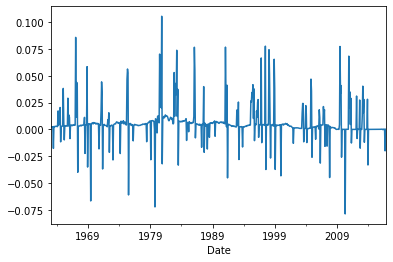

In [26]:
# Plot the average return of MFQS in time series
Data['MFQS']=Data.RF*Data.Wrf+Data.MKTUS*Data.Wmkt
Data.MFQS.plot()
plt.show()

* Why sometimes the strategy is totally flat?

* how does it compare with the market?

In [29]:
# Look at average returns for the US market and our MFQS strategy
Data[['MKTUS','MFQS']].mean()


MKTUS    0.009052
MFQS     0.005750
dtype: float64

In [28]:
# Look at volatilities for the US market and our MFQS strategy
Data[['MKTUS','MFQS']].std()

MKTUS    0.044003
MFQS     0.016796
dtype: float64

Both average return and volatility of `MFQS' are lower than the US market

> Is it surprising?

> Does it mean that someone that is more risk-averse than the average investor can benefit from investing in MFQS?


Looking at cumulative returns:



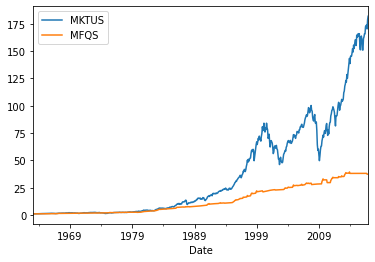

In [27]:
(Data[['MKTUS','MFQS']]+1).cumprod().plot()
plt.show()

Lets look at Sharpe Ratios. 

> How do we construct it?

> How do we annualize?

In [30]:
Data[['MKTUS','MFQS']].subtract(Data.RF,axis=0).mean()/Data[['MKTUS','MFQS']].std()*12**0.5

MKTUS    0.404668
MFQS     0.379282
dtype: float64

* Does this mean that MFQS is a bad idea?

* What does this mean for a mean-variance investor that can borrow and lend at the risk-free rate and must choose between investing in the risk-free and the market or the risk-free and MFQS?

* Is there a degree of risk aversion that would make the investor prefer MFQS over the Market?

* What if the investor could invest in all three assets? would he ever invest in MFQS?